In [0]:
from tensorflow.python.keras.models import Sequential
# layers
# dense - Each neuron recieves input from all the neurons in the previous layer
# dropout - used to prevent a model from overfitting 
# flatten - to flatten the input (e.g: n * c * h * w -> n*(c*h*w))
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os
import zlib
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimage

%matplotlib inline

In [6]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-03-12 16:27:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  86.3MB/s    in 0.8s    

2020-03-12 16:27:58 (86.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# reading the zip file
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall(path='/tmp')
zip_.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [9]:
validation_cats_dir, train_dogs_dir

('/tmp/cats_and_dogs_filtered/validation/cats',
 '/tmp/cats_and_dogs_filtered/train/dogs')

In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir( item_dir ) # input - direction; output - file
  # to receive path: os.path.join( item_dir, file )
  item_files = [ os.path.join( item_dir, file ) for file in all_item_dirs ][:top]
  
  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5,5,idx+1)
  
    img = mpimage.imread(img_path)
    plt.imshow(img)
  
  plt.tight_layout() #increase the space between images


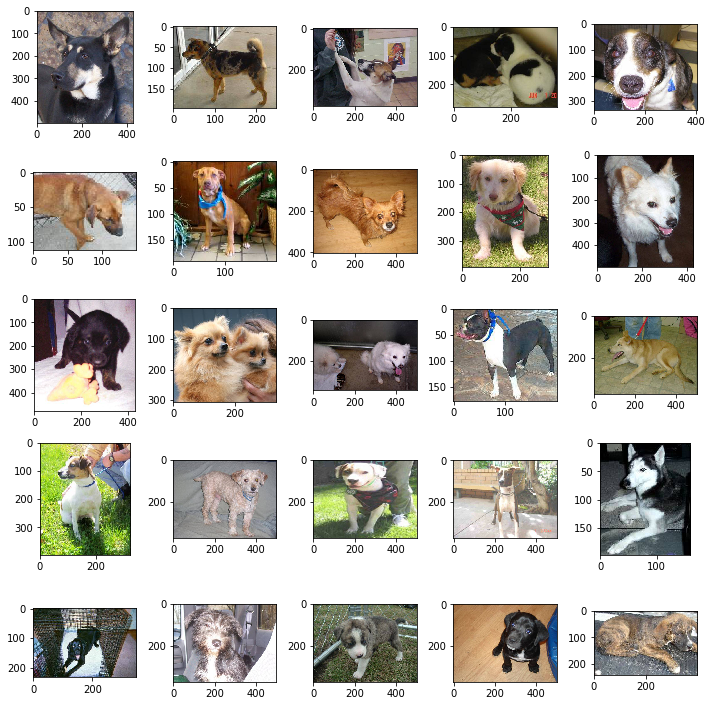

In [11]:
plot_images(train_dogs_dir)

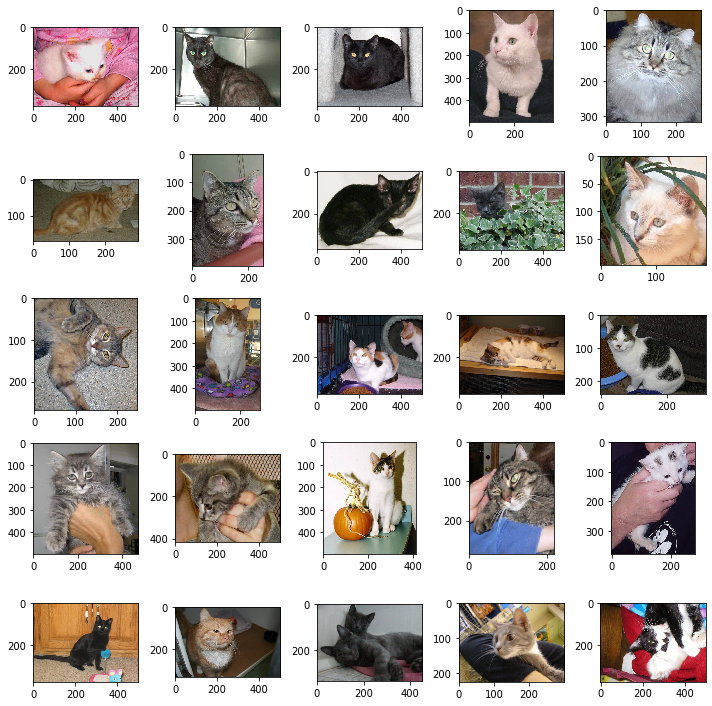

In [12]:
plot_images(train_cats_dir)

In [16]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'), #first argument - number of filters
    MaxPool2D((2,2)),
    
    Flatten(),
    
    Dense(128, activation='relu'), # first argument - number of nodes
    Dropout(0.5),
    # we need only one neuron because we have binary classification ->dog/cat
    Dense(1, activation='sigmoid') 
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# fit_generator - we load images gradually
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/10
Epoch 1/10
100/100 - 96s - loss: 0.7242 - acc: 0.4960 - val_loss: 0.6688 - val_acc: 0.5560
Epoch 2/10
Epoch 1/10
100/100 - 94s - loss: 0.6895 - acc: 0.5235 - val_loss: 0.6544 - val_acc: 0.5630
Epoch 3/10
Epoch 1/10
100/100 - 94s - loss: 0.6602 - acc: 0.5795 - val_loss: 0.6378 - val_acc: 0.6260
Epoch 4/10
Epoch 1/10
100/100 - 94s - loss: 0.6393 - acc: 0.6385 - val_loss: 0.6620 - val_acc: 0.6110
Epoch 5/10
Epoch 1/10
100/100 - 94s - loss: 0.6033 - acc: 0.6865 - val_loss: 0.6179 - val_acc: 0.6770
Epoch 6/10
Epoch 1/10
100/100 - 94s - loss: 0.5344 - acc: 0.7375 - val_loss: 0.6083 - val_acc: 0.6950
Epoch 7/10
Epoch 1/10
100/100 - 94s - loss: 0.4897 - acc: 0.7605 - val_loss: 0.5682 - val_acc: 0.7340
Epoch 8/10
Epoch 1/10
100/100 - 94s - loss: 0.4027 - acc: 0.8165 - val_loss: 0.6278 - val_acc: 0.7120
Epoch 9/10
Epoch 1/10
100/100 - 94s - loss: 0.3522 - acc: 0.8325 - val_loss: 0.6653 - val_acc: 0.7130
Epoch 10/10
Epoch 1/10
100/100 - 94s - loss: 0.2690 - acc: 0.8780 - val_loss: 0.68